In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('max_rows',100)

## Using Citibike data 2019 Jan as for initial tests

In [2]:
Jan_2019_df = pd.read_csv('Citibike_data_2019_2021/201901.csv')
Jan_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [3]:
Jan_2019_df.shape

(967287, 15)

In [4]:
Jan_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967287 entries, 0 to 967286
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             967287 non-null  int64  
 1   starttime                967287 non-null  object 
 2   stoptime                 967287 non-null  object 
 3   start station id         967269 non-null  float64
 4   start station name       967269 non-null  object 
 5   start station latitude   967287 non-null  float64
 6   start station longitude  967287 non-null  float64
 7   end station id           967269 non-null  float64
 8   end station name         967269 non-null  object 
 9   end station latitude     967287 non-null  float64
 10  end station longitude    967287 non-null  float64
 11  bikeid                   967287 non-null  int64  
 12  usertype                 967287 non-null  object 
 13  birth year               967287 non-null  int64  
 14  gend

In [5]:
print("Count of Null values in Dataframe : \n{} ".format(Jan_2019_df.isna().sum()))

Count of Null values in Dataframe : 
tripduration                0
starttime                   0
stoptime                    0
start station id           18
start station name         18
start station latitude      0
start station longitude     0
end station id             18
end station name           18
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64 


### Dropping rows with NA

In [6]:
Jan_2019_df.dropna(inplace=True)
#Jan_2019_df.reset_index(inplace=True)

In [7]:
print("Count of Null values in Dataframe : {}".format(Jan_2019_df.isna().sum().sum()))

Count of Null values in Dataframe : 0


### Convert 'starttime' and 'stoptime' to datetime

In [8]:
Jan_2019_df['starttime'] = pd.to_datetime(Jan_2019_df['starttime'])
Jan_2019_df['stoptime'] = pd.to_datetime(Jan_2019_df['stoptime'])

In [9]:
Jan_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


<AxesSubplot:>

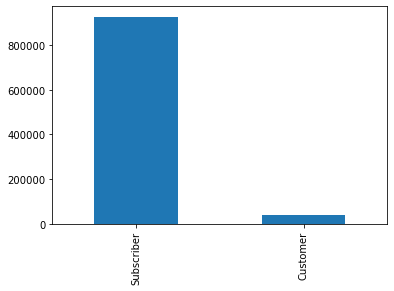

In [10]:
Jan_2019_df['usertype'].value_counts().plot(kind='bar')

<AxesSubplot:>

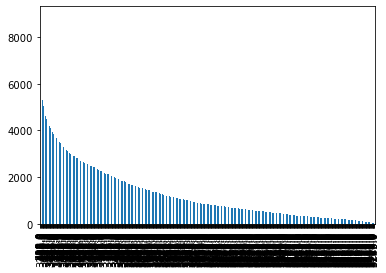

In [11]:
Jan_2019_df['start station id'].value_counts().plot(kind='bar')


<AxesSubplot:>

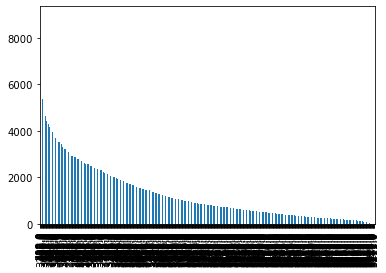

In [12]:
Jan_2019_df['end station id'].value_counts().plot(kind='bar')

In [13]:
Jan_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


## Converting tripduration to minutes

In [14]:
Jan_2019_df['tripduration'] = Jan_2019_df['tripduration']/60

In [15]:
Jan_2019_df.shape

(967269, 15)

In [16]:
max(Jan_2019_df.tripduration)

44664.01666666667

# Removing data where ride time was > 2 hrs

In [17]:
Jan_2019_df = Jan_2019_df[Jan_2019_df['tripduration'] < 120]

In [18]:
Jan_2019_df['tripduration'].max()

119.88333333333334

# Checking if any trips have 0 tripduration

In [19]:
Jan_2019_df[Jan_2019_df['tripduration'] == 0]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender


# OUTLIER DATA

([<matplotlib.axis.XTick at 0x7f98b0e79c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

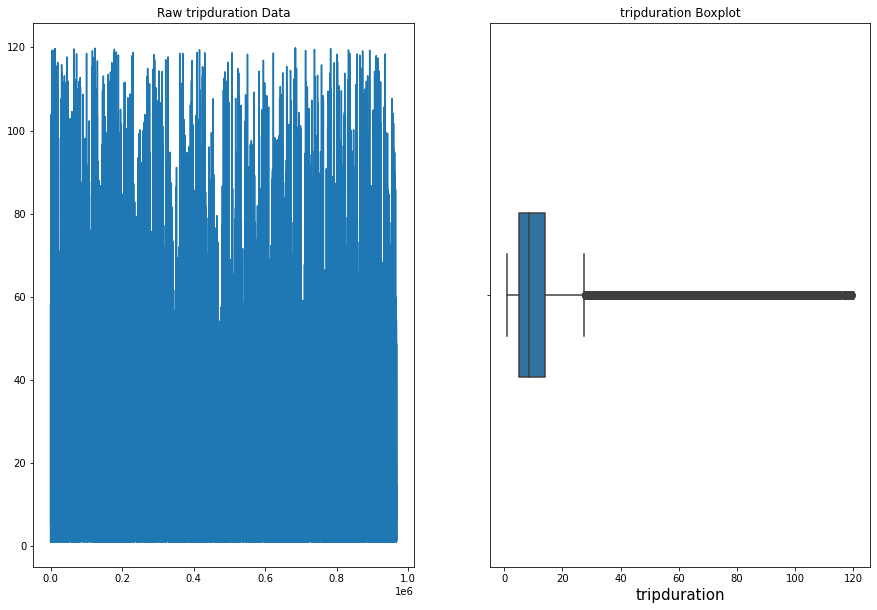

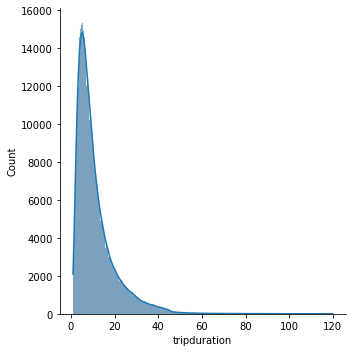

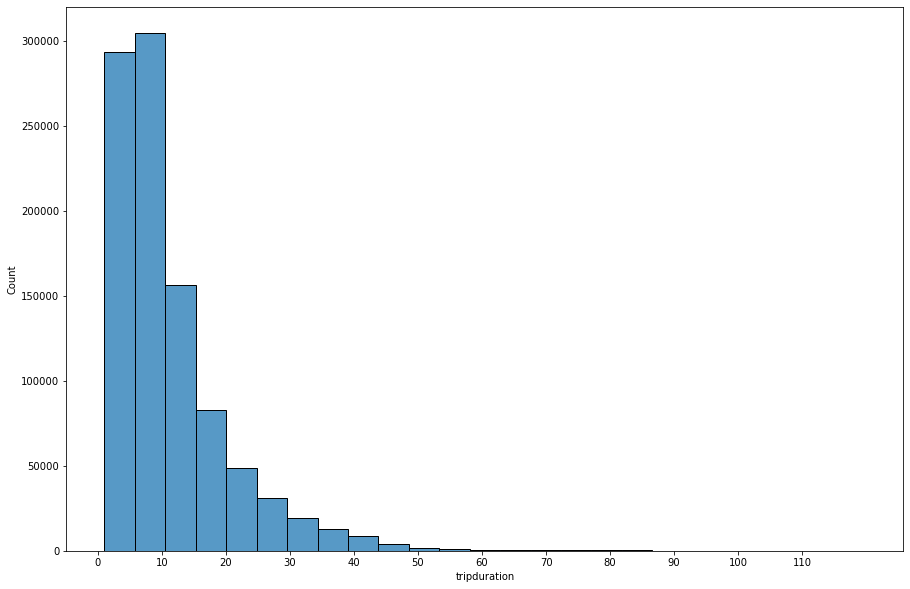

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].plot(Jan_2019_df['tripduration'])
axes[0].set_title('Raw tripduration Data')

sns.boxplot(x = Jan_2019_df['tripduration'],width=0.3, ax=axes[1])
axes[1].set_xlabel("tripduration", fontsize = 15)
axes[1].set_title("tripduration Boxplot")

sns.displot(Jan_2019_df['tripduration'],kde = True)
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=Jan_2019_df.tripduration,bins=25)
plt.xticks(np.arange(0,120,10))


<AxesSubplot:title={'center':'Trip Duration (minutes) Outliers'}>

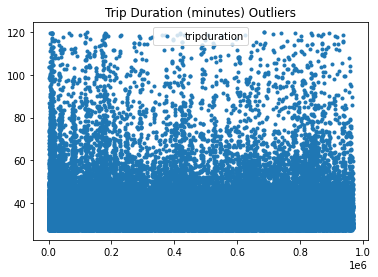

In [21]:
#Extracting Outliers

#Lower Quantile
tripduration_Q1 = Jan_2019_df['tripduration'].quantile(0.25)
#Upper Quantile
tripduration_Q3 = Jan_2019_df['tripduration'].quantile(0.75)

#Inter Quantile Range
tripduration_IQR = tripduration_Q3 - tripduration_Q1

tripduration_LB = tripduration_Q1 - 1.5*tripduration_IQR #Lower Bound
tripduration_UB = tripduration_Q3 + 1.5*tripduration_IQR #Upper Bound

tripduration_IQR_outliers = Jan_2019_df[(Jan_2019_df.tripduration <= tripduration_LB) | (Jan_2019_df.tripduration >= tripduration_UB)]


tripduration_IQR_outliers.tripduration.plot(style='.',title='Trip Duration (minutes) Outliers', legend=True)

In [22]:
tripduration_LB , tripduration_UB

(-8.274999999999999, 27.525)

In [23]:
Jan_2019_df.shape[0], tripduration_IQR_outliers.shape[0] #number of outliers

(965656, 61349)

In [24]:
tripduration_IQR_outliers.index

Int64Index([     3,     17,     37,     51,     71,     85,     95,    113,
               114,    117,
            ...
            967021, 967083, 967128, 967136, 967137, 967228, 967229, 967253,
            967271, 967280],
           dtype='int64', length=61349)

# Removing Outliers

In [25]:
Jan_2019_df = Jan_2019_df.drop(tripduration_IQR_outliers.index)


In [26]:
Jan_2019_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,5.333333,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,5.266667,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,9.850000,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
4,5.050000,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1
5,8.916667,2019-01-01 00:08:33.179,2019-01-01 00:17:28.354,3630.0,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3529.0,Lenox Ave & W 130 St,40.810792,-73.943068,30315,Subscriber,1989,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967282,4.850000,2019-01-31 17:33:26.449,2019-01-31 17:38:17.894,3354.0,3 St & Prospect Park West,40.668132,-73.973638,3423.0,West Drive & Prospect Park West,40.661063,-73.979453,19780,Subscriber,1978,2
967283,7.283333,2019-01-31 18:57:45.338,2019-01-31 19:05:02.497,3354.0,3 St & Prospect Park West,40.668132,-73.973638,3313.0,6 Ave & 12 St,40.666318,-73.985462,34365,Subscriber,1976,2
967284,2.883333,2019-01-31 19:11:41.193,2019-01-31 19:14:34.335,3354.0,3 St & Prospect Park West,40.668132,-73.973638,3418.0,Plaza St West & Flatbush Ave,40.675021,-73.971115,25889,Subscriber,1977,1
967285,4.066667,2019-01-31 20:54:51.144,2019-01-31 20:58:55.310,3354.0,3 St & Prospect Park West,40.668132,-73.973638,3346.0,Berkeley Pl & 7 Ave,40.675147,-73.975232,34649,Subscriber,1994,1


# Checking if start and end station are the same

In [27]:
#number of trips that started and ended at same station
start_end_same = Jan_2019_df[Jan_2019_df['start station name'] == Jan_2019_df['end station name']].shape[0]

#number of trips that started and ended at different station
start_end_diff = Jan_2019_df.shape[0]-start_end_same

In [28]:
start_end_same

11798

In [29]:
start_end_diff

892509

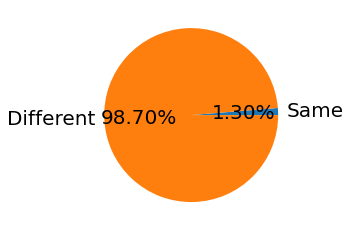

In [30]:
fig,ax=plt.subplots()
ax.pie([start_end_same,start_end_diff], labels=['Same', 'Different'], autopct='%1.2f%%',textprops={'fontsize': 20})
fig.patch.set_facecolor('white')

In [31]:
#TAKES FAR TOO LONG TO RUN

# fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# axes[0].plot(Jan_2019_df['tripduration'])
# axes[0].set_title('Raw tripduration Data')
# axes[0].set_xlabel("region_id", fontsize = 15)

# sns.boxplot(x = Jan_2019_df['tripduration'],width=0.3, ax=axes[1])
# axes[1].set_xlabel("tripduration", fontsize = 15)
# axes[1].set_title("tripduration Boxplot")

#sns.displot(Jan_2019_df['tripduration'],kde = True)

In [32]:
Jan_2019_df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,5.333333,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,5.266667,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1


In [33]:
#Using certain columns
Interested_Columns = ['tripduration','starttime','stoptime','start station id','start station latitude','start station longitude','bikeid']
Jan_2019_df_reduced = Jan_2019_df[Interested_Columns]

# Total Trips per day

In [34]:
#converting string to datetime object
Jan_2019_df['starttime']= pd.to_datetime(Jan_2019_df['starttime'])
Total_trips_per_day = Jan_2019_df[['tripduration','starttime']].groupby([pd.PeriodIndex(Jan_2019_df['starttime'], freq="D")])['tripduration'].count().reset_index()
Total_triptime_per_day = Jan_2019_df[['tripduration','starttime']].groupby([pd.PeriodIndex(Jan_2019_df['starttime'], freq="D")])['tripduration'].sum().reset_index()

<AxesSubplot:>

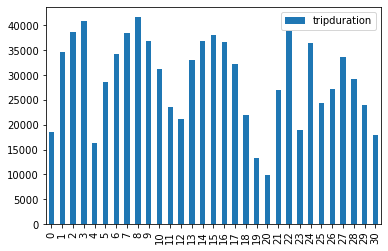

In [35]:
Total_trips_per_day.plot(kind='bar')

<AxesSubplot:>

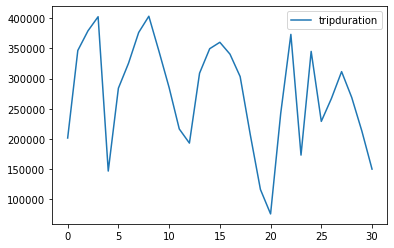

In [36]:
Total_triptime_per_day.plot(kind='line')

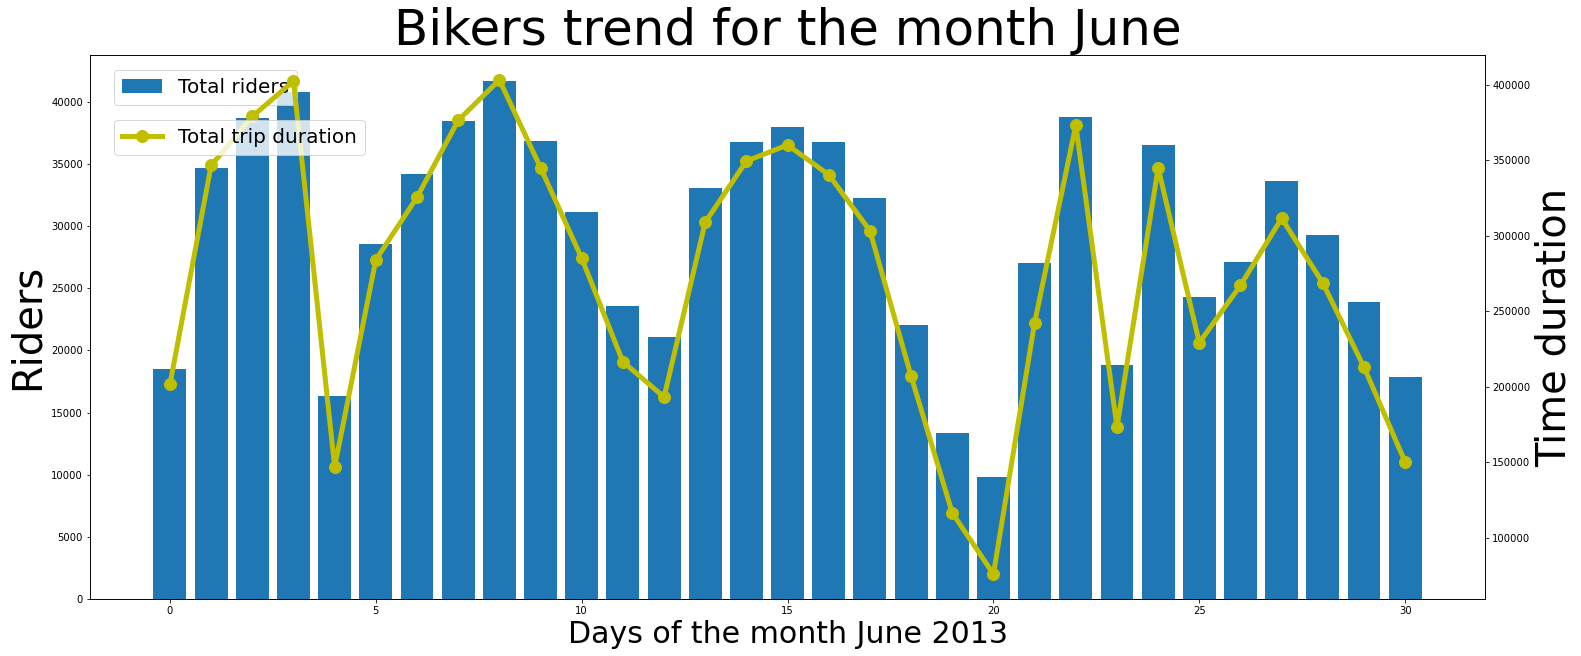

In [37]:
fig,ax=plt.subplots(figsize=(25,10))
ax.bar(Total_trips_per_day.index,Total_trips_per_day.tripduration, data=Jan_2019_df, label='Total riders')
#bbox_to_anchor is to position the legend box
ax.legend(loc ="lower left", bbox_to_anchor=(0.01, 0.89), fontsize='20')
ax.set_xlabel('Days of the month June 2013', fontsize=30)
ax.set_ylabel('Riders',  fontsize=40)
ax.set_title('Bikers trend for the month June', fontsize=50)

#creating twin x axis to plot line chart is same figure
ax2=ax.twinx()
#plotting total trip duration of all user per day
ax2.plot('tripduration', data=Total_triptime_per_day, color='y', label='Total trip duration', marker='o', linewidth=5, markersize=12)
ax2.set_ylabel('Time duration',  fontsize=40)
ax2.legend(loc ="upper left", bbox_to_anchor=(0.01, 0.9), fontsize='20')


# Top 10 Start Locations

In [38]:
#top 10 start station
top_start_station = Jan_2019_df['start station name'].value_counts()[:10]

In [41]:
top_start_station

Pershing Square North    8392
W 21 St & 6 Ave          6260
8 Ave & W 31 St          5976
Broadway & E 22 St       5597
E 17 St & Broadway       5496
W 41 St & 8 Ave          5231
Broadway & E 14 St       5036
8 Ave & W 33 St          4897
E 47 St & Park Ave       4818
W 16 St & 8 Ave          4755
Name: start station name, dtype: int64